# Part I

Do these exercises in explore.ipynb notebook. As always, add, commit, and push your changes.

 - Section 1 - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

 1. Acquire, prepare & split your data.
 
 

In [4]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats

#my own files with my own functions
import acquire
import prepare

# train test split function
from sklearn.model_selection import train_test_split

In [5]:
# acquire data
df = acquire.get_iris_data()

In [6]:
df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [7]:
# prepare data with function from prepare module
prepare.prep_iris(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
# split data with function from prepare module with species as the target variable
train, validate, test = prepare.split_data(df, 'species')

train: 90 (60.0% of 150)
validate: 30 (20.0% of 150)
test: 30 (20.0% of 150)


 ### 2. Univariate Stats
    
    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
     - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
     - Document takeaways & any actions.

In [9]:
# isolate quantitative variables
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

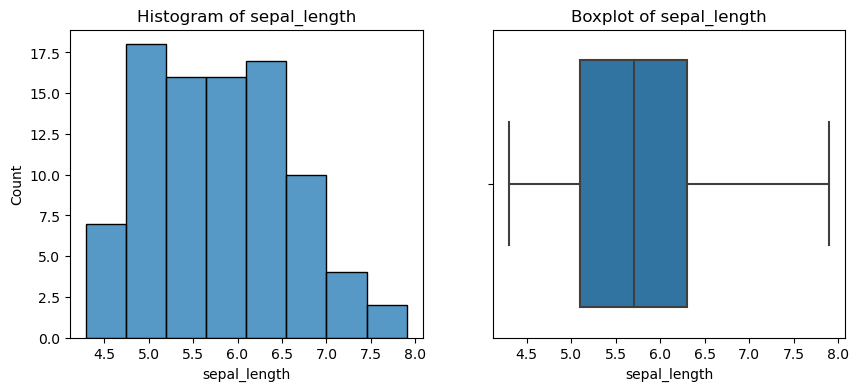

count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64




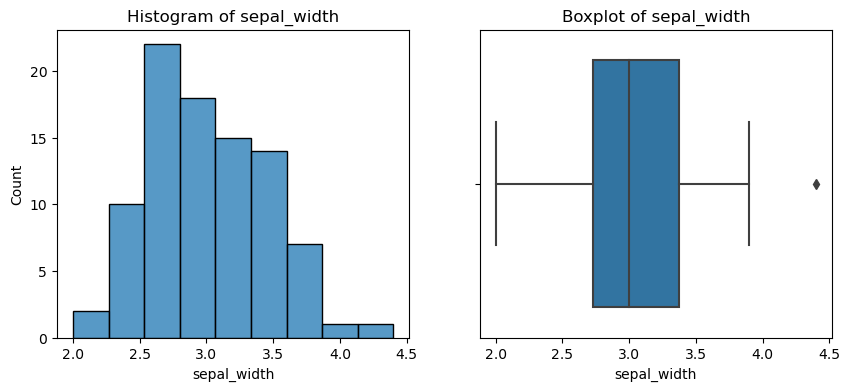

count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64




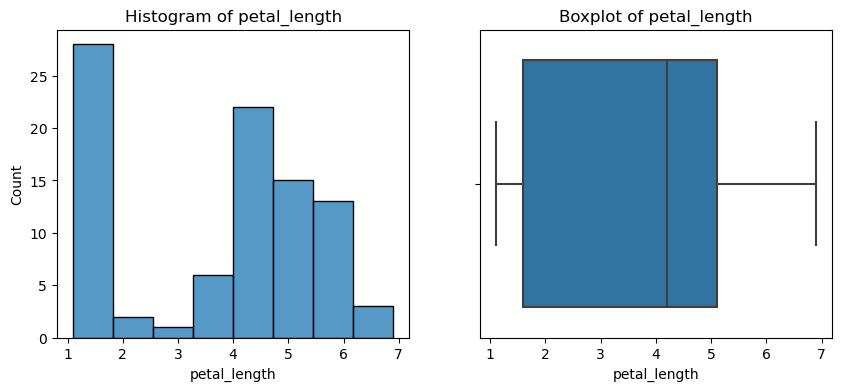

count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64




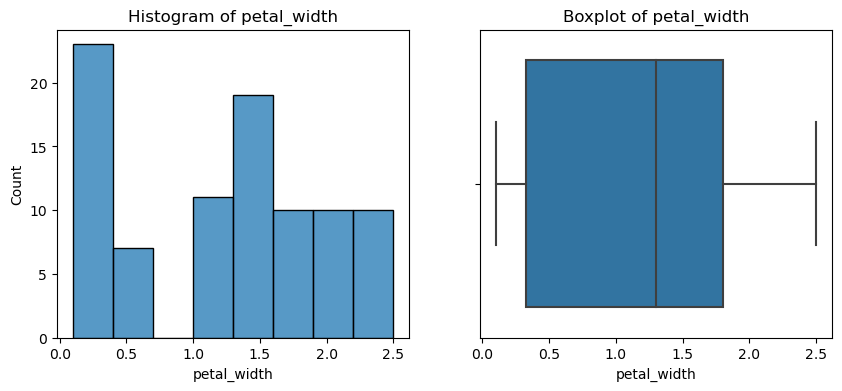

count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [10]:
for col in num_cols:
    # Create a new figure for each column
    plt.figure(figsize=(10, 4))
    
    # Plot histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    sns.histplot(train[col], fill=True)
    plt.title(f'Histogram of {col}')

    # Plot boxplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    sns.boxplot(x=train[col])
    print()
    plt.title(f'Boxplot of {col}')
    print()
    plt.show()

    # Display descriptive statistics
    print(train[col].describe())


In [11]:
# isolate categorical variable
cat_cols = train.select_dtypes(include=['object']).columns    
cat_cols

Index(['species'], dtype='object')

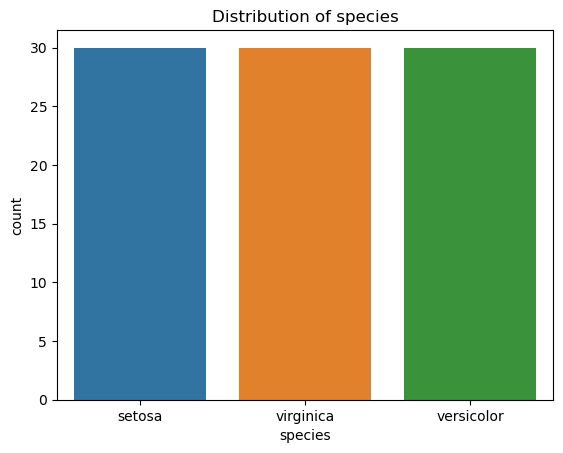

col_0       no_of_species
species                  
setosa                 30
versicolor             30
virginica              30


In [12]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    freq_table = pd.crosstab(train[col], f'no_of_{col}')
    print(freq_table)

###### Takeaways & any actions:

Our goal is to identify potential relationships between different variables and a target variable. Therefore, comparing the univariate statistical data from our continous vriables and one categorical variable show evidence that relationships can be further explored with proper statistical analysis. 

###  3. Bivariate Stats
    
      - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
     - For each measurement type, compute the descriptive statistics for each species.
     - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

     - Document takeaways & any actions.
 

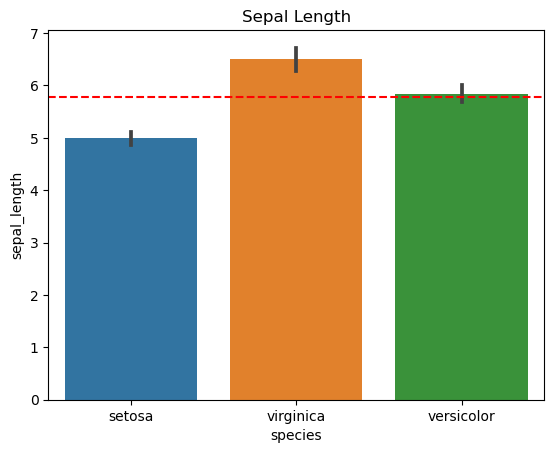

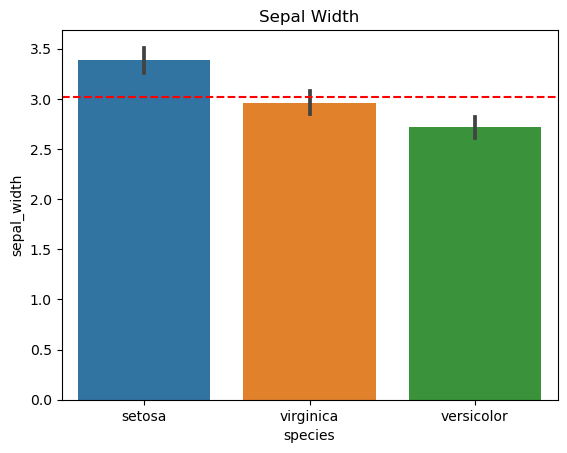

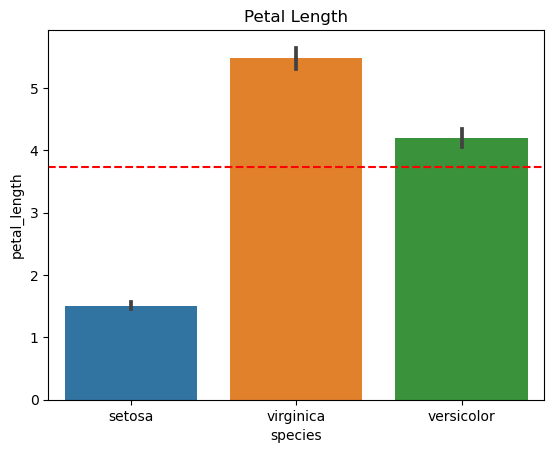

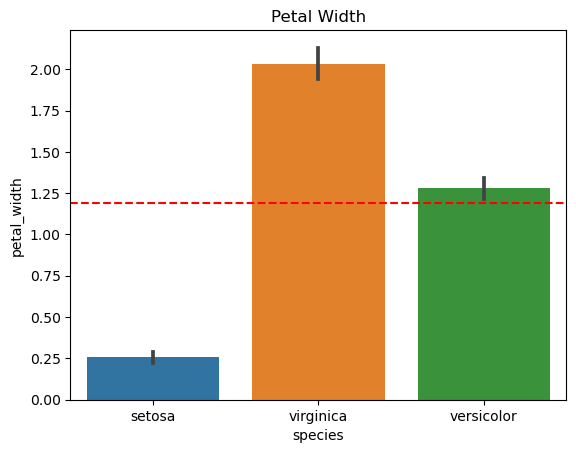

In [13]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).


# Calculate the overall mean for each measurement type
mean_sepal_length = train['sepal_length'].mean()
mean_sepal_width = train['sepal_width'].mean()
mean_petal_length = train['petal_length'].mean()
mean_petal_width = train['petal_width'].mean()

# Create a barplot for each measurement type
sns.barplot(data=train, x='species', y='sepal_length')
plt.axhline(mean_sepal_length, color='red', linestyle='--')
plt.title('Sepal Length')
plt.show()

sns.barplot(data=train, x='species', y='sepal_width')
plt.axhline(mean_sepal_width, color='red', linestyle='--')
plt.title('Sepal Width')
plt.show()

sns.barplot(data=train, x='species', y='petal_length')
plt.axhline(mean_petal_length, color='red', linestyle='--')
plt.title('Petal Length')
plt.show()

sns.barplot(data=train, x='species', y='petal_width')
plt.axhline(mean_petal_width, color='red', linestyle='--')
plt.title('Petal Width')
plt.show()

In [14]:
#For each measurement type, compute the descriptive statistics for each species.

# Group the data by species and compute the descriptive statistics for each measurement type
grouped = train.groupby('species').describe()

grouped

sepal_length                                                   \
                  count      mean       std  min    25%  50%    75%  max   
species                                                                    
setosa             30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7   
versicolor         30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0   
virginica          30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9   

           sepal_width        ... petal_length      petal_width            \
                 count  mean  ...          75%  max       count      mean   
species                       ...                                           
setosa            30.0  3.39  ...        1.600  1.9        30.0  0.256667   
versicolor        30.0  2.72  ...        4.500  5.1        30.0  1.283333   
virginica         30.0  2.96  ...        5.675  6.9        30.0  2.033333   

                                                  
                 std  min  25%   50%    75%  max  
species                                           
setosa      0.100630  0.1  0.2  0.20  0.300  0.5  
versicolor  0.170361  1.0  1.2  1.30  1.375  1.6  
virginica   0.277095  1.4  1.8  2.05  2.300  2.5  

[3 rows x 32 columns]

In [15]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test 
# (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
# Do the same for the other measurement types.


# separate quantitative variables
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [16]:
# Loop through each column and perform the Mann-Whitney U test
for col in num_cols:
    # separate data for the virginica and versicolor species
    virginica_data = train[train['species'] == 'virginica'][col]
    versicolor_data = train[train['species'] == 'versicolor'][col]
    
    # Perform the Mann-Whitney U test to compare the mean measurement between the two species
    statistic, pvalue = stats.mannwhitneyu(virginica_data, versicolor_data)

    print(f'Mann-Whitney U test results for Virginica vs Versicolor {col}:')
    print(f'{virginica_data.name} mean: {virginica_data.mean():.2f}')
    print(f'{versicolor_data.name} mean: {versicolor_data.mean():.2f}')
    print(f'Statistic: {statistic:.2f}')
    print(f'p-value: {pvalue:.20f}')
    print(' ')

Mann-Whitney U test results for Virginica vs Versicolor sepal_length:
sepal_length mean: 6.51
sepal_length mean: 5.84
Statistic: 738.00
p-value: 0.00002061706981215365
 
Mann-Whitney U test results for Virginica vs Versicolor sepal_width:
sepal_width mean: 2.96
sepal_width mean: 2.72
Statistic: 627.50
p-value: 0.00844990346320156037
 
Mann-Whitney U test results for Virginica vs Versicolor petal_length:
petal_length mean: 5.48
petal_length mean: 4.20
Statistic: 884.00
p-value: 0.00000000013681068336
 
Mann-Whitney U test results for Virginica vs Versicolor petal_width:
petal_width mean: 2.03
petal_width mean: 1.28
Statistic: 889.00
p-value: 0.00000000007124230126
 


###### Takeaways & any actions.

Variable dimensions may relate to species. There is a significant difference in these mesurements between Virginica and Versicolor. Recommend using statistical tests to compare dimensions between these species and others.

### 4. Multivariate Stats
 - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
 - Visualize two numeric variables of the species. Hint: sns.relplot with hue or col
 - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
 - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
 - Document takeaways and any actions.


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


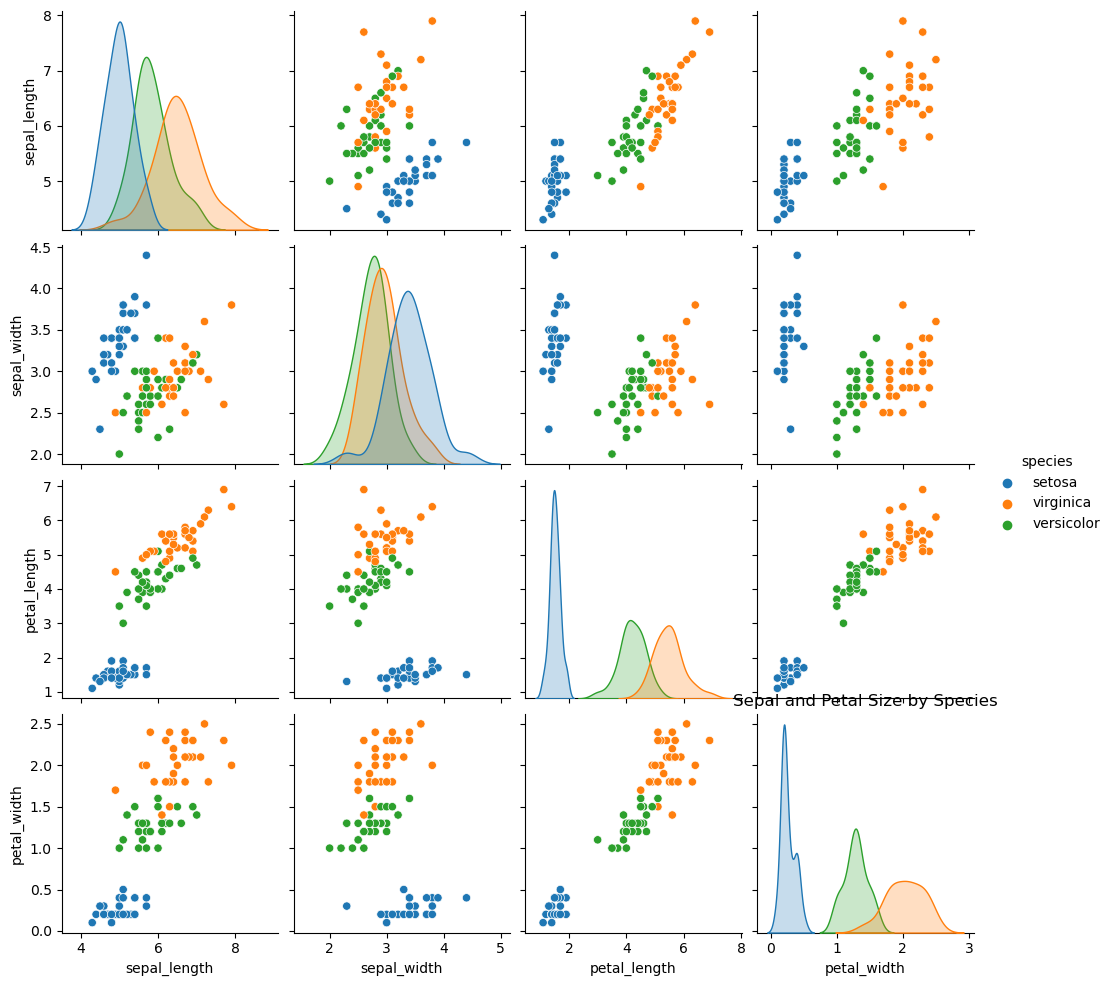

In [18]:
# Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
# initallize empty list
var = []
for col in train:
    # if float add to list
    if train[col].dtype=='float64':
        var.append(col)
        #plot with variable names
sns.pairplot(data=train, hue='species', vars=var)
plt.title('Sepal and Petal Size by Species')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


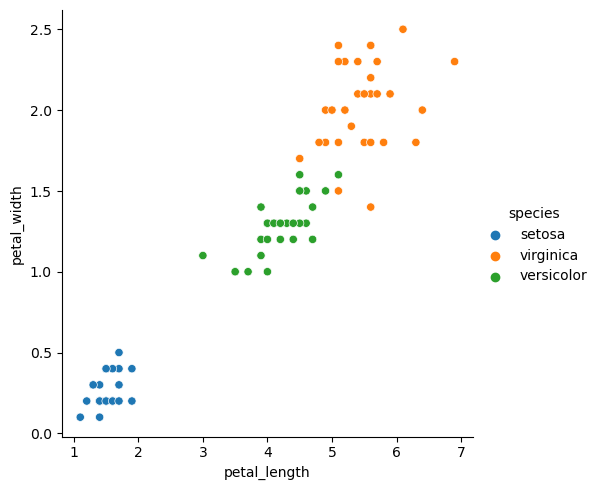

In [20]:
# Visualize two numeric variables of the species. Hint: sns.relplot with hue or col
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species')


In [ ]:
# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.


# Dont need to do for the sake of this exercise.

In [35]:
# Ask a specific question of the data, such as: is the sepal area signficantly 
# different in virginica compared to setosa? Answer the question through both 
# a plot and using a mann-whitney or t-test. If you use a t-test, be sure 
# assumptions are met (independence, normality, equal variance).

# Hypothesis: 
# H0: Sepal length is the same in Setosa and Virginica 
# Ha: Sepal length is different in Setosa and Virginica
alpha = 0.05


In [21]:
# isolate variables
setosa = train[train['species'] == 'setosa']
virginica = train[train['species'] == 'virginica']

In [25]:
# check variance
print(setosa.sepal_length.var())

virginica.sepal_length.var()

0.12547126436781617


0.37995402298850584

In [26]:
# run stats test
tstat, p = stats.ttest_ind(virginica.sepal_length, setosa.sepal_length, equal_var= False)

tstat, p

(11.659146038447933, 2.270712445244737e-15)

In [38]:
# print and evaluate p-value
print('T-Stat:', tstat)

if p < alpha:
    print(f'P-Value: {p}. Reject the null hypothesis')
else:
    print(f'P-Value: {p}. Fail to reject the null hypothesis')

T-Stat: 11.659146038447933
P-Value: 2.270712445244737e-15. Reject the null hypothesis


In [ ]:
# Document takeaways and any actions.


# There is a difference in sepal_lenght between the species Setosa and Virginica.


# Part II  Titanic dataset 


Explore your titanic dataset more completely.
 - Determine drivers of the target variable
 - Determine if certain columns should be dropped
 - Determine if it would be valuable to bin some numeric columns
 - Determine if it would be valuable to combine multiple columns into one.
 
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
# This data set has been explored in our lesson

# Part III

 - Explore your telco data to discover drivers of churn
 - Determine if certain columns should be dropped
 - Determine if it would be valuable to bin some numeric columns
 - Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [1]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats

#my own files with my own functions
import acquire
import prepare

# train test split function
from sklearn.model_selection import train_test_split

#### Acquire phase

In [2]:
# acquire data
df = acquire.get_telco_data()

In [3]:
# checking data
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# look at original df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

> We can drop some SQL joiner columns and change some values (tota_charges) to run stats tests.

#### Prepare phase

In [5]:
# prepare data with function from prepare module
df = prepare.prep_telco(df)

In [6]:
# check df after prepare
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64

In [9]:
df.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
0003-MKNFE,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
0004-TLHLJ,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


> columns have been dropped and values have been changed

#### Explore phase
 - only using TRAIN data during this phase

In [10]:
# split data with function from prepare module with churn as the target variable
train, validate, test = prepare.split_data(df, 'churn')

train: 4225 (60.0% of 7043)
validate: 1409 (20.0% of 7043)
test: 1409 (20.0% of 7043)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 4083-BFNYK to 7562-UXTPG
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4225 non-null   object 
 1   senior_citizen         4225 non-null   object 
 2   partner                4225 non-null   object 
 3   dependents             4225 non-null   object 
 4   tenure                 4225 non-null   int64  
 5   phone_service          4225 non-null   object 
 6   multiple_lines         4225 non-null   object 
 7   online_security        4225 non-null   object 
 8   online_backup          4225 non-null   object 
 9   device_protection      4225 non-null   object 
 10  tech_support           4225 non-null   object 
 11  streaming_tv           4225 non-null   object 
 12  streaming_movies       4225 non-null   object 
 13  paperless_billing      4225 non-null   object 
 14  monthly_charges        4225 non-null   float64

In [12]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,Female,Yes,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
5804-LEPIM,Female,Yes,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
4895-TMWIR,Male,Yes,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,No internet service,Mailed check
1342-JPNKI,Male,No,No,No,10,Yes,Yes,No,No,No,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
3397-AVTKU,Male,No,No,No,43,Yes,No,No,Yes,No,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


After splitting data, I can now separate variables into two categories: continuous and categorical

In [13]:
# make two lists, one with all categorical variables and another with all continouus vairables
#intializing empty lists
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for how many unique values
        # if less than 100, append to cat_col
        if train[col].nunique() < 100:
            cat_col.append(col)
        else: 
            #if it has more than 100 unique values, append to continous column variable
            con_col.append(col)

In [14]:
# check lists
cat_col 

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [15]:
con_col

['monthly_charges', 'total_charges']

a for loop can prints contingency tables with features vs target 

In [16]:
# Target variable is churn
target_variable = 'churn'

# Initialize an empty list to store columns for comparison
columns_to_compare = []

# Create a for loop to iterate through each column in the categorical column list
# appending our comparision list as long as the column is not churn
for column in cat_col:
    if column != target_variable:
        columns_to_compare.append(column)
    else:
        pass

In [17]:
columns_to_compare

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']


Contingency Table for gender vs. churn:

churn     No  Yes
gender           
Female  1550  559
Male    1554  562


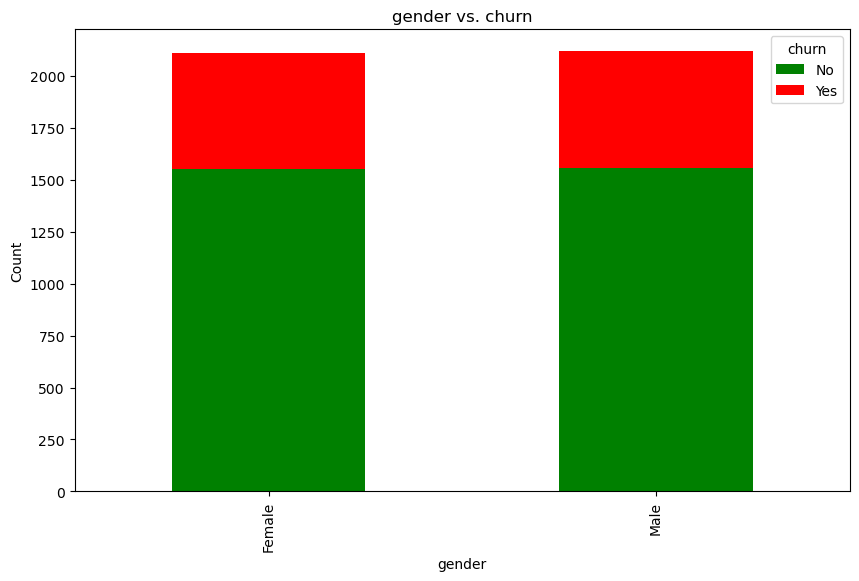


Contingency Table for senior_citizen vs. churn:

churn             No  Yes
senior_citizen           
No              2696  835
Yes              408  286


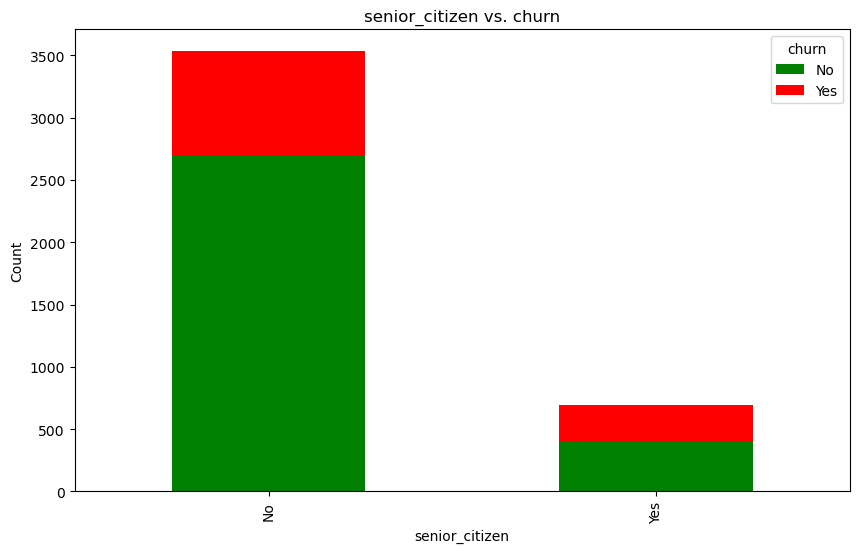


Contingency Table for partner vs. churn:

churn      No  Yes
partner           
No       1445  715
Yes      1659  406


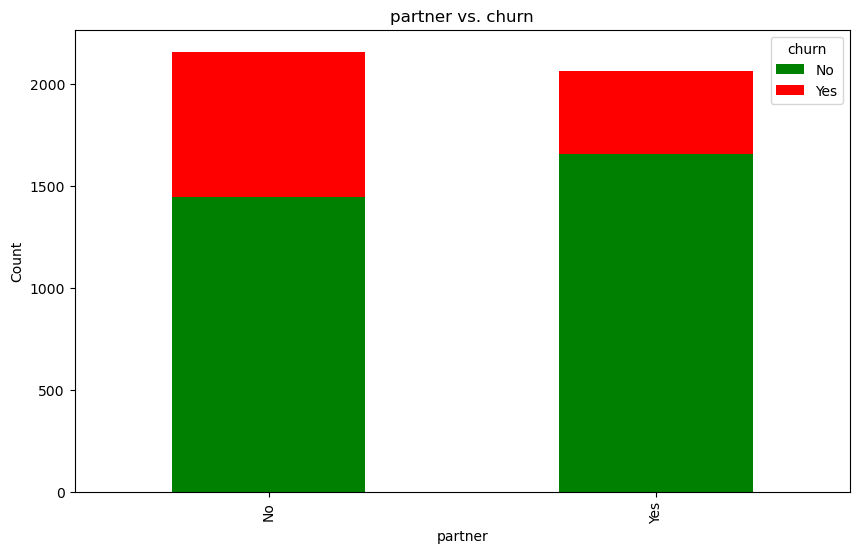


Contingency Table for dependents vs. churn:

churn         No  Yes
dependents           
No          2042  919
Yes         1062  202


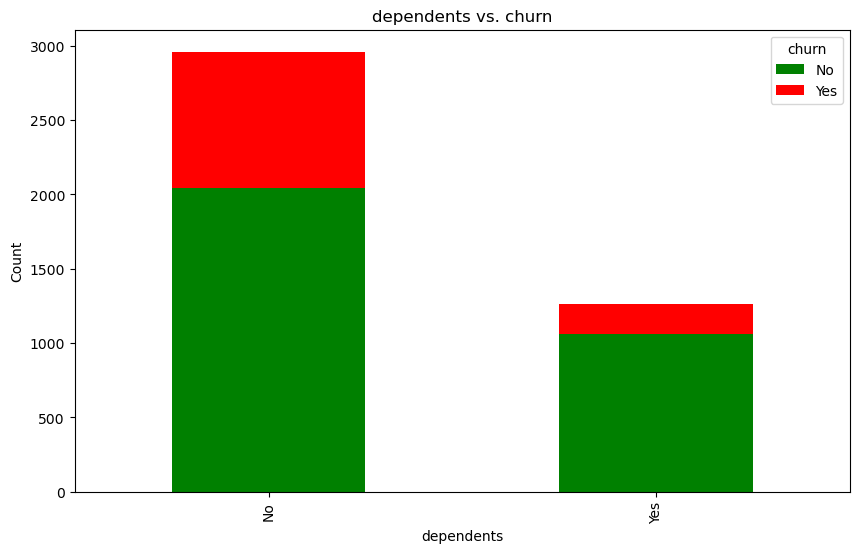


Contingency Table for tenure vs. churn:

churn    No  Yes
tenure          
0         8    0
1       128  225
2        61   81
3        67   57
4        57   51
...     ...  ...
68       51    6
69       60    4
70       65    5
71       94    4
72      228    5

[73 rows x 2 columns]


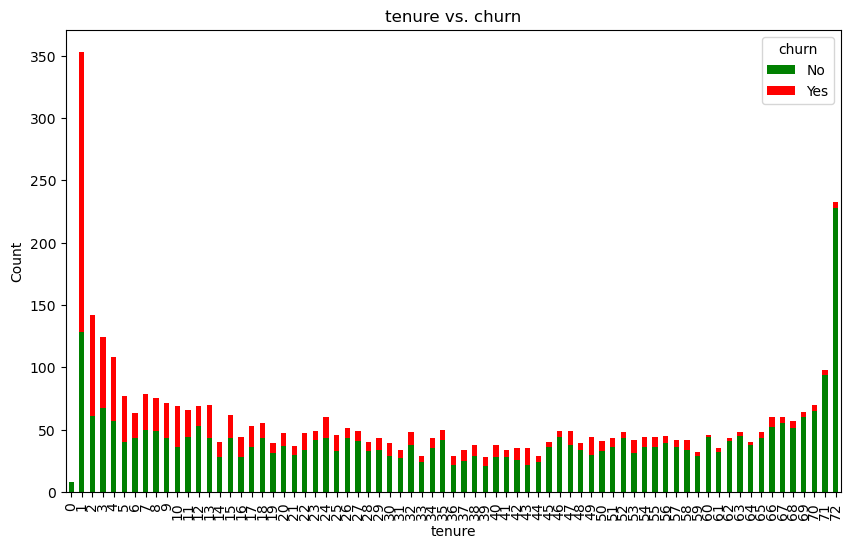


Contingency Table for phone_service vs. churn:

churn            No   Yes
phone_service            
No              295    99
Yes            2809  1022


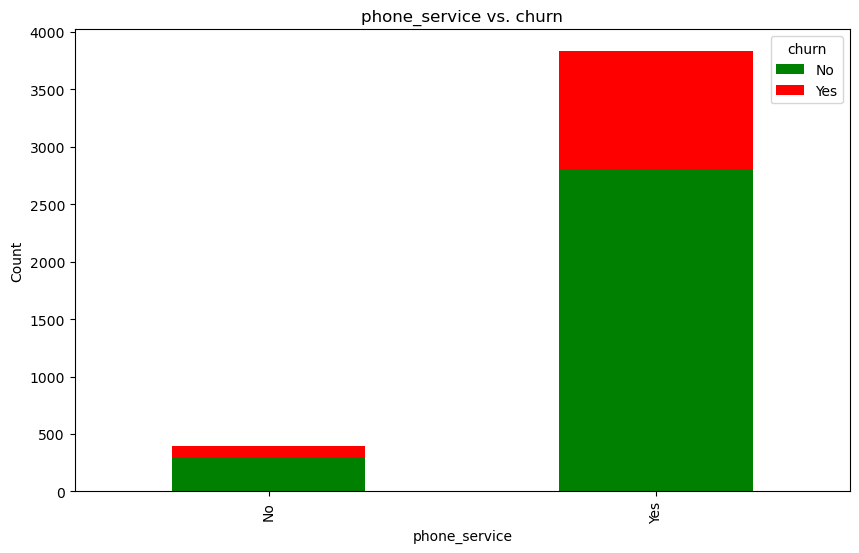


Contingency Table for multiple_lines vs. churn:

churn               No  Yes
multiple_lines             
No                1500  520
No phone service   295   99
Yes               1309  502


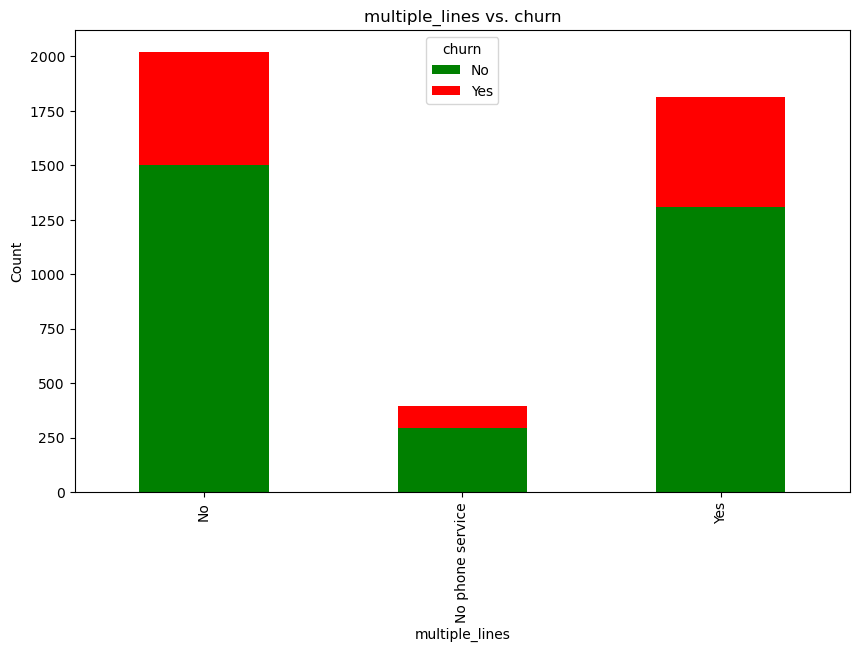


Contingency Table for online_security vs. churn:

churn                  No  Yes
online_security               
No                   1230  885
No internet service   848   70
Yes                  1026  166


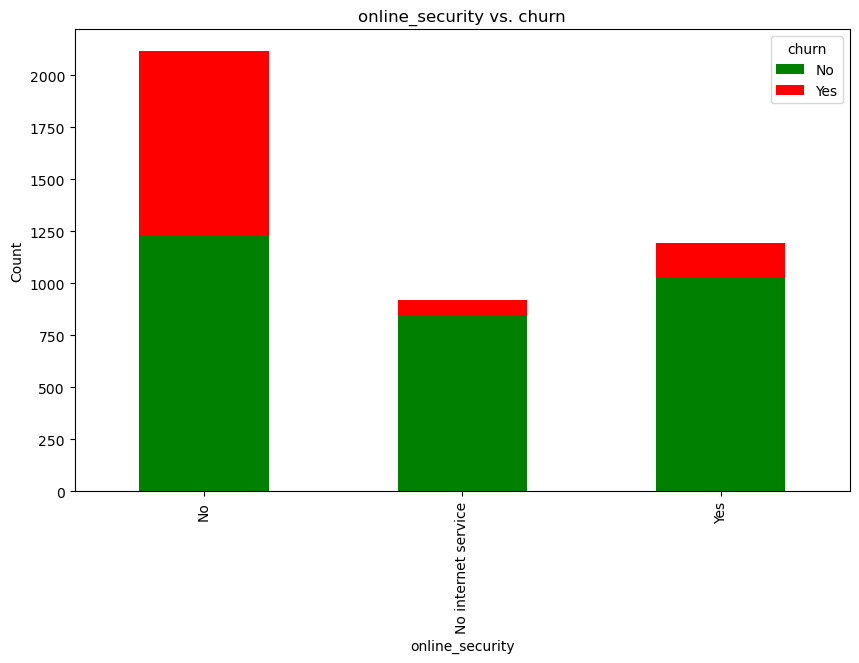


Contingency Table for online_backup vs. churn:

churn                  No  Yes
online_backup                 
No                   1097  732
No internet service   848   70
Yes                  1159  319


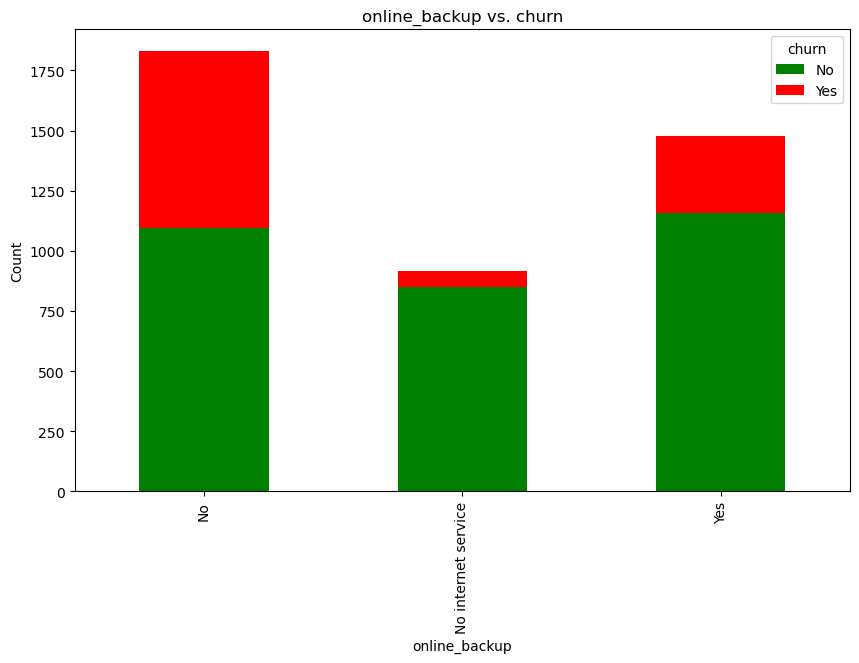


Contingency Table for device_protection vs. churn:

churn                  No  Yes
device_protection             
No                   1119  702
No internet service   848   70
Yes                  1137  349


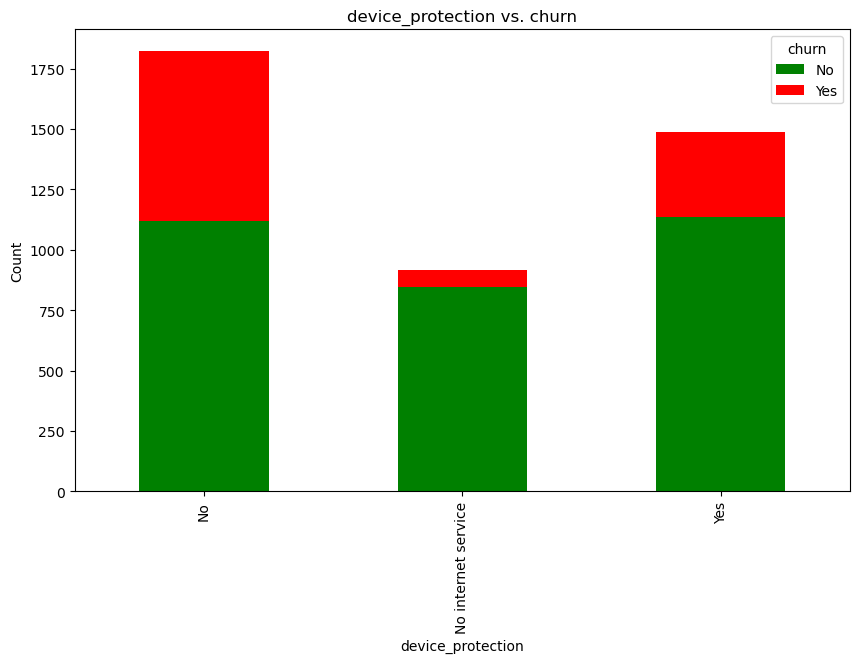


Contingency Table for tech_support vs. churn:

churn                  No  Yes
tech_support                  
No                   1230  866
No internet service   848   70
Yes                  1026  185


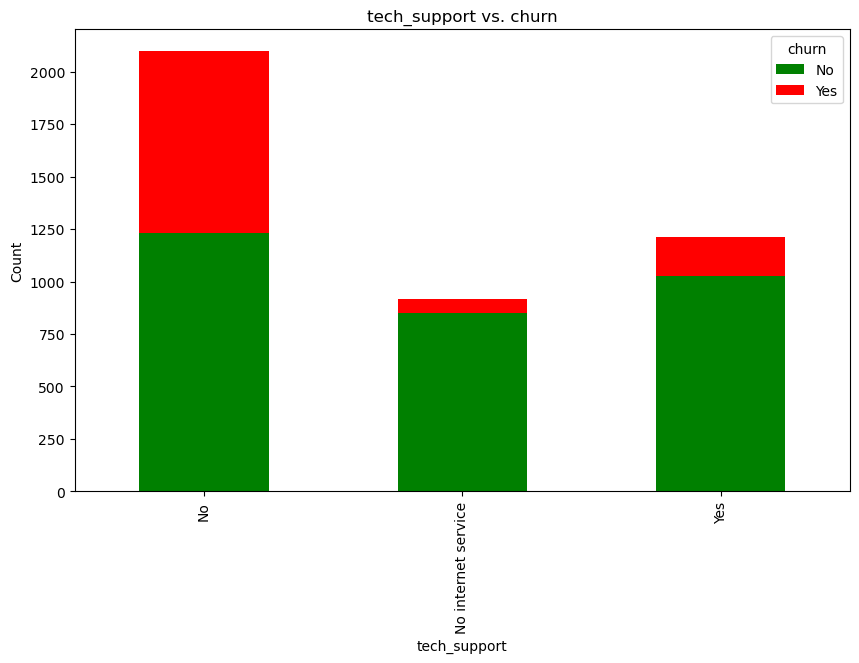


Contingency Table for streaming_tv vs. churn:

churn                  No  Yes
streaming_tv                  
No                   1100  573
No internet service   848   70
Yes                  1156  478


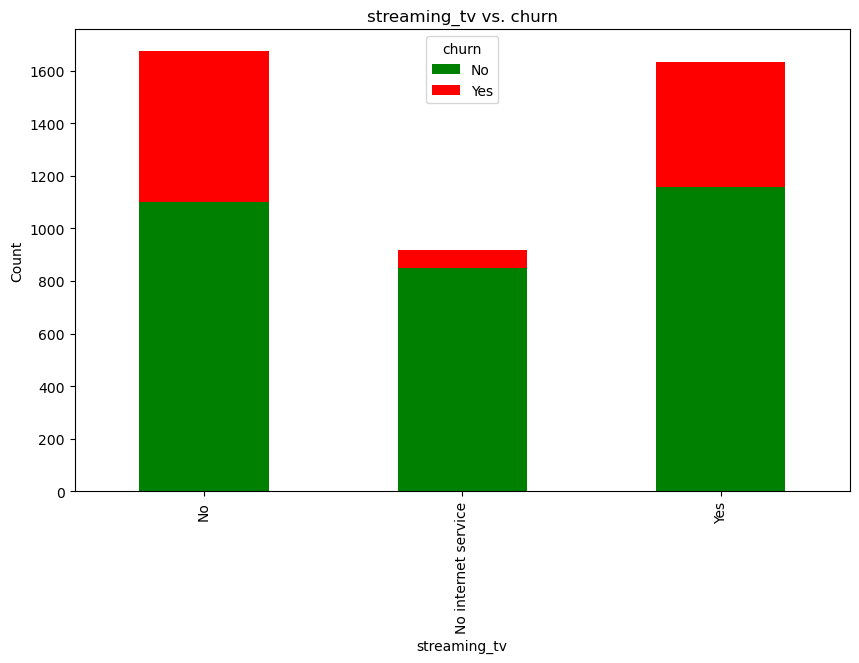


Contingency Table for streaming_movies vs. churn:

churn                  No  Yes
streaming_movies              
No                   1101  554
No internet service   848   70
Yes                  1155  497


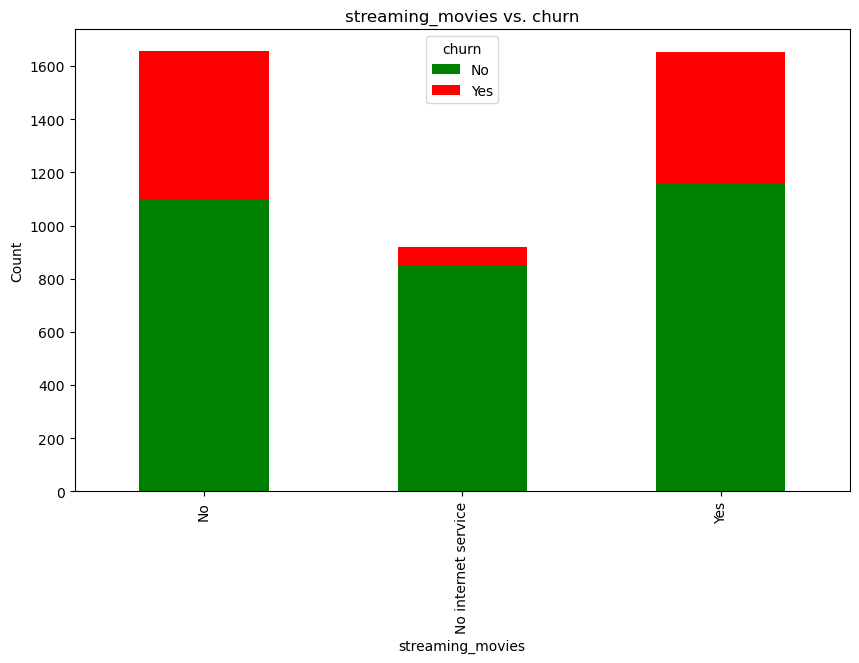


Contingency Table for paperless_billing vs. churn:

churn                No  Yes
paperless_billing           
No                 1437  281
Yes                1667  840


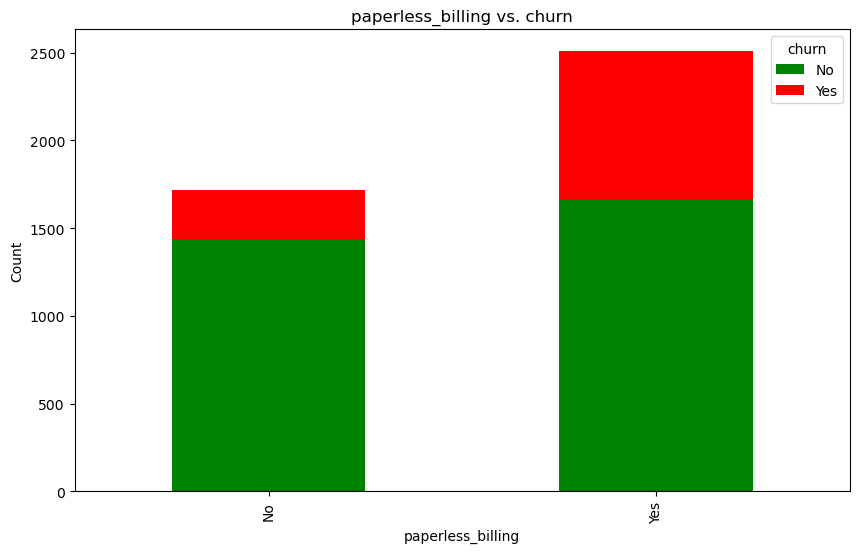


Contingency Table for contract_type vs. churn:

churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30


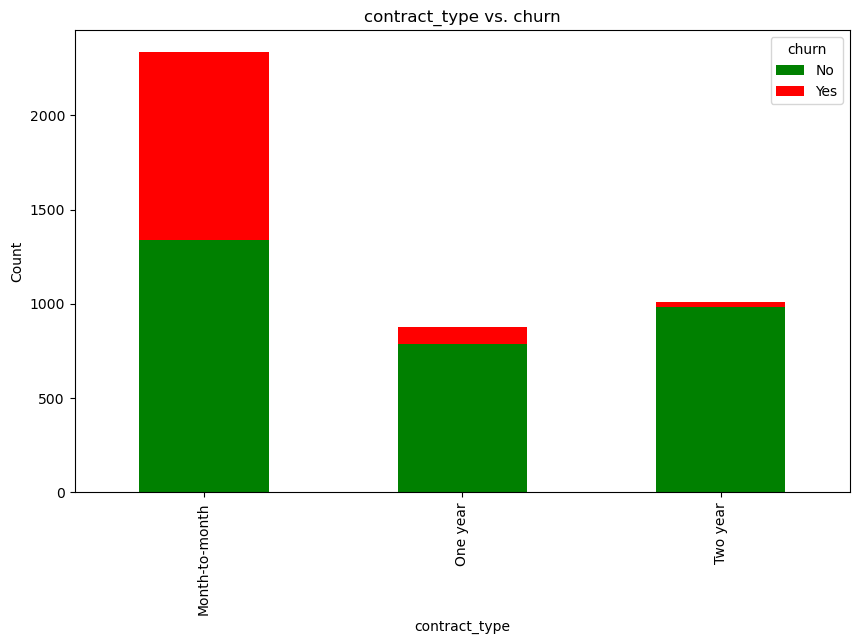


Contingency Table for internet_service_type vs. churn:

churn                    No  Yes
internet_service_type           
DSL                    1140  269
Fiber optic            1116  782
No internet service     848   70


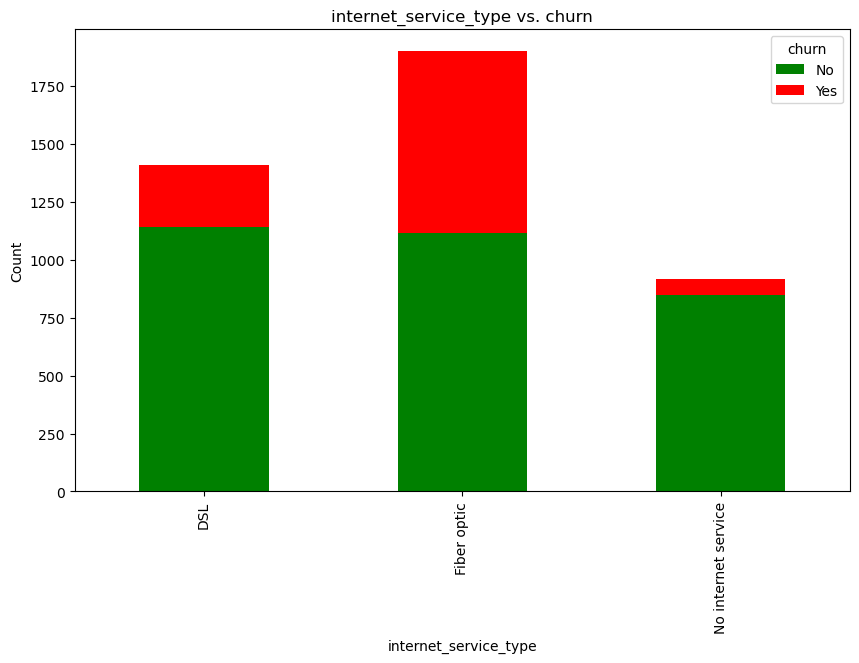


Contingency Table for payment_type vs. churn:

churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180


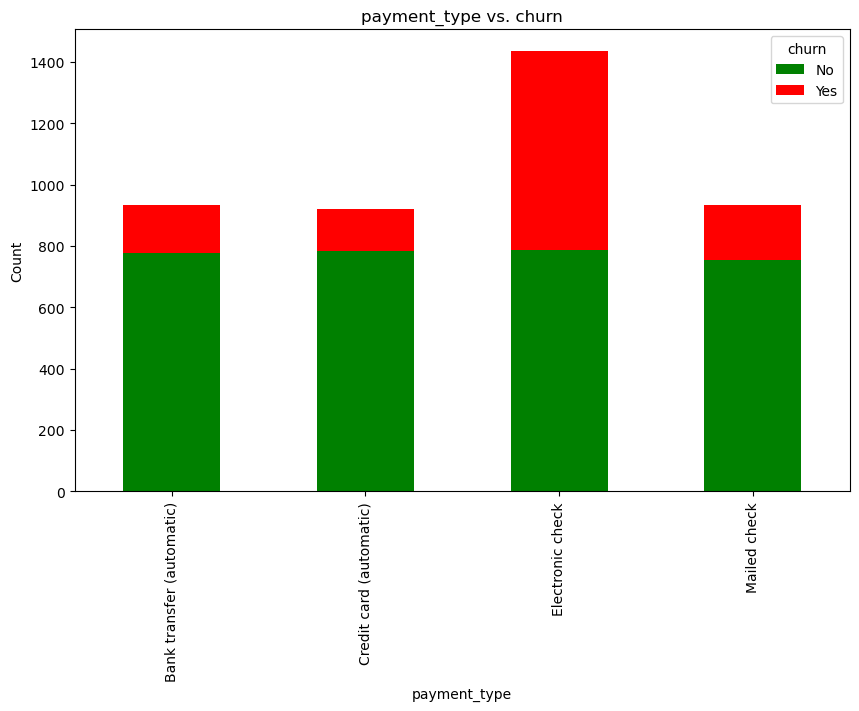

In [18]:
# For loop to create contingency table and bar plot for each comparision column vs churn
# describe and visualize the distribution of categorical variables and make inferences about 
# the equality of proportions, independence of the variables, or agreement between variables.
for column in columns_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train[target_variable])
    
    # Display the contingency table
    print(f"\nContingency Table for {column} vs. {target_variable}:\n")
    print(contingency_table)
    
    # To help visualize the contingency table, we can use a stacked bar plot
    contingency_table.plot.bar(stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Box plot to view continuous variables vs target variable

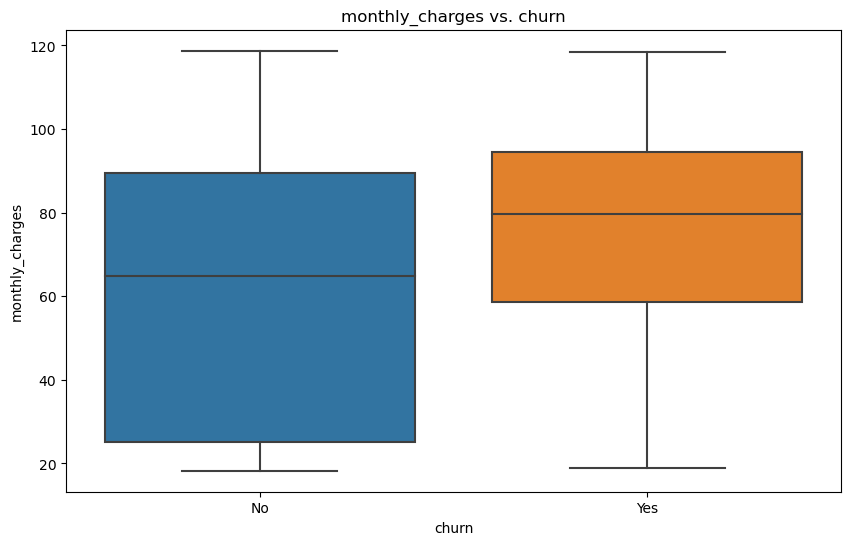

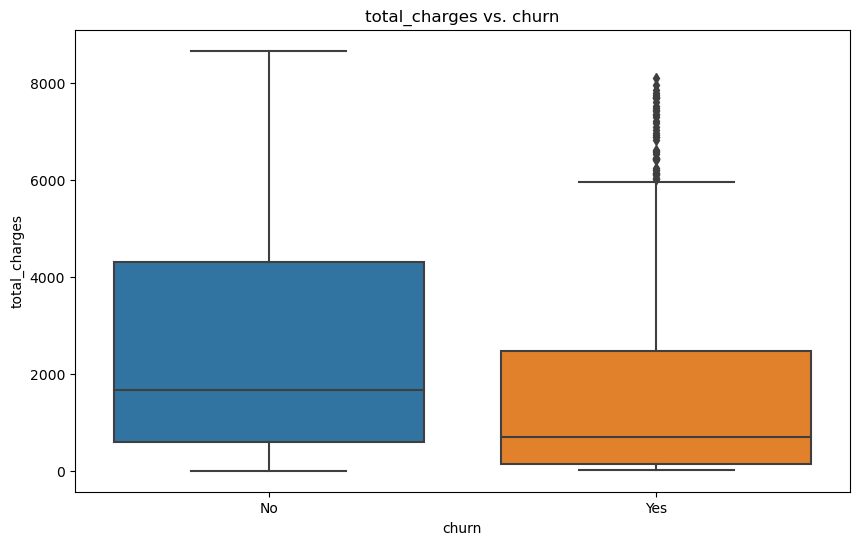

In [19]:
# Target variable
target_variable = 'churn'

# Create a for loop to compare each continuous variable to the target variable
for column in con_col:
    # Visualize the distribution of the continuous variable 
    plt.figure(figsize=(10, 6))
    # Box plot with target variable and count
    sns.boxplot(x=target_variable, y=column, data=train)
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.show()

> investegating relationships between features and target 

### FIRST RELATIONSHIP

 1. Hypothesize

Q: does payment type affect whether or not someone churned?

In [14]:
train.payment_type.value_counts()

payment_type
Electronic check             1434
Mailed check                  935
Bank transfer (automatic)     935
Credit card (automatic)       921
Name: count, dtype: int64

In [16]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

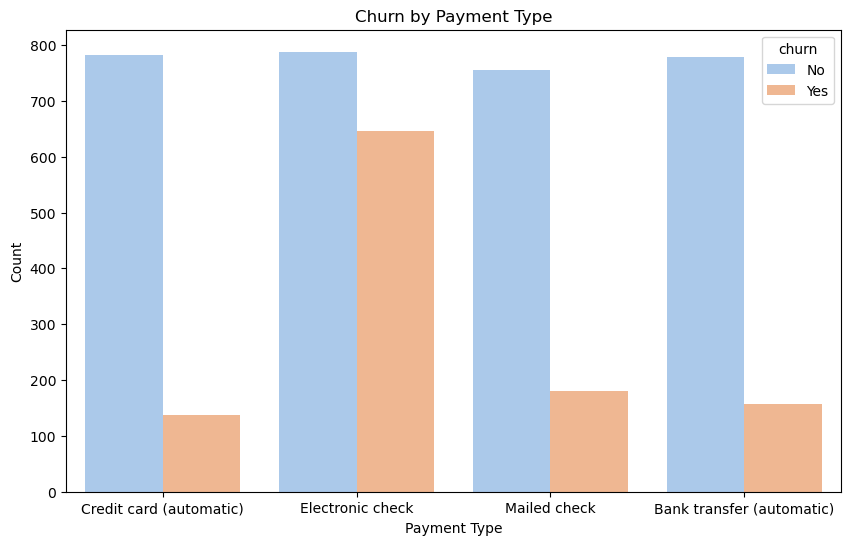

In [24]:
# customers with electronic check payment types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(x='payment_type', hue='churn', data=train, palette='pastel')
plt.title('Churn by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

> customers with electronic check payment type churned a lot more than other payment types. 

3. Analyze with stats

two categorical variables:  use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between payment type and whether or not someone has churned

$H_a$: There is a relationship between payment type and whether or not someone has churned

In [27]:
alpha = 0.05

In [25]:
# create crosstab
observed = pd.crosstab(train.churn, train.payment_type)

In [26]:
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,778,783,788,755
Yes,157,138,646,180


In [28]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [30]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[778 783 788 755]
 [157 138 646 180]]

Expected
[[ 686  676 1053  686]
 [ 248  244  380  248]]

----
chi^2 = 386.1840
p     = 0.0000


In [31]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between payment type and whether or not someone churned

4. Summarize

One particular type of payment method shows a lot of customer churn. Maybe this is due to some factor related to costs, fees, or delivery speed. Will need to investigate further asking are there fees associated with each payment type, what are their delivery speeds?

### Second Relationship

 1. Hypothesize

Q: does contract type affect whether or not someone has churned?

What are churn and contract type? Two categorical variables.

In [34]:
train.contract_type.value_counts()

contract_type
Month-to-month    2335
Two year          1011
One year           879
Name: count, dtype: int64

In [35]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

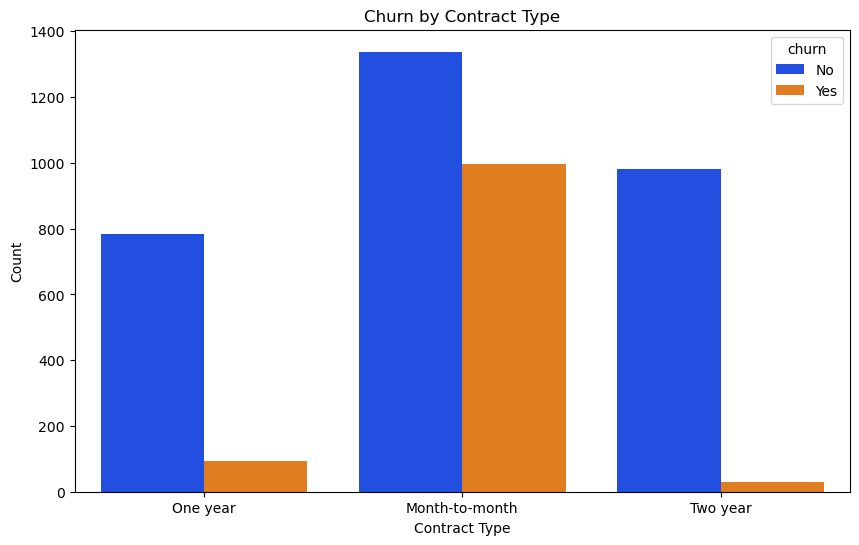

In [39]:
# customers with month to month contract types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(x='contract_type', hue='churn', data=train, palette='bright')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

> customers with month to month contract types churn mroe than other contract types

3. Analyze with stats

two categorical variables, we can use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between contract type and whether or not someone has churned

$H_a$: There is a relationship between contract type and whether or not someone has churned

In [45]:
alpha = 0.05

In [46]:
# create crosstab
observed_ct = pd.crosstab(train.churn, train.contract_type)
observed_ct

contract_type,Month-to-month,One year,Two year
churn,,,
No,1338,785,981
Yes,997,94,30


In [47]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_ct)

In [48]:
#output values
print('Observed')
print(observed_ct.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1338  785  981]
 [ 997   94   30]]

Expected
[[1715  645  742]
 [ 619  233  268]]

----
chi^2 = 714.1745
p     = 0.0000


In [49]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between contract type and whether or not someone churned

4. Summarize

One particular contract type (month-to-month) has a lot of customers with churned status. This would make sense becuase people with long contracts can not churn as easily as customers with month to month contracts. However, I would like to examine if contract type and tenure relates to churn. 

### Third Relationship

 1. Hypothesize

Q: does tenure affect whether or not someone has churned?

What are churn and tenure? One categorical variable and one continuous variable? Maybe, unless we bin tenure into years instead of months.

In [71]:
train.tenure.value_counts()

tenure
1     353
72    233
2     142
3     124
4     108
     ... 
36     29
33     29
44     29
39     28
0       8
Name: count, Length: 73, dtype: int64

In [63]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

<Axes: xlabel='churn', ylabel='tenure'>

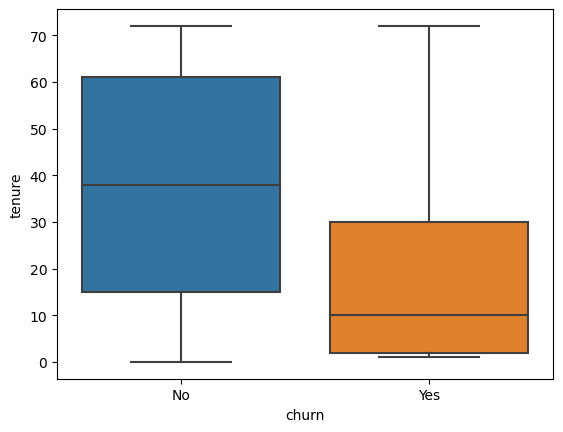

In [65]:
sns.boxplot(data=train, x='churn', y='tenure')

> it appears customers are churning early on in their tenure. Customers who have stayed with telco are still with telco

3. Analyze with statistics

comparing categorical to categorical because we are going to bin tenure into years, of which the higest tenure is 72 months.

In [32]:
# Create bins for tenure in terms of years
bins = [0, 12, 24, 36, 48, 60, 72, 84]  # adjust as needed

# Create labels for the bins (representing years)
labels = ['0', '1', '2', '3', '4', '5', '6']

# Bin the 'tenure' column
train['tenure_years'] = pd.cut(train['tenure'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'tenure_years' column
print(train[['tenure', 'tenure_years']])


      tenure tenure_years
2865      38            3
4107       2            0
3453      11            0
923       10            0
2370      43            3
...      ...          ...
1286       1            0
4999      47            3
6892      72            6
3718       8            0
5354      13            1

[4225 rows x 2 columns]


In [33]:
train.tenure_years.value_counts()

tenure_years
0    1235
5     669
1     612
2     532
4     506
3     438
6     233
Name: count, dtype: int64

In [34]:
observed_tenure = pd.crosstab(train.churn, train.tenure_years)
observed_tenure

tenure_years,0,1,2,3,4,5,6
churn,,,,,,,
No,626,448,422,343,417,620,228
Yes,609,164,110,95,89,49,5


two categorical variables, we can use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between tenure and whether or not someone has churned

$H_a$: There is a relationship between tenure and whether or not someone has churned

In [14]:
alpha = 0.05

In [18]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_tenure)

In [19]:
#output values
print('Observed')
print(observed_tenure.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[626 448 422 343 417 620 228]
 [609 164 110  95  89  49   5]]

Expected
[[907 449 390 321 371 491 171]
 [327 162 141 116 134 177  61]]

----
chi^2 = 561.8805
p     = 0.0000


In [20]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between tenure and whether or not someone churned

4. Summarize

It may be possible that a large numbers of customers are churning early in their tenure compared to those with higher tenure. I would like to find more information about the differences between customers that have and have not churned at the particular tenure value where most of the churned customers are leaving. 